In [ ]:
# przetwarzanie  
import numpy as np
import pandas as pd

# wizualizacja   
import matplotlib.pyplot as plt
import seaborn as sns

# model 
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# współczynniki oceny 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [ ]:
insurance_data = pd.read_csv('insurance.csv')  
insurance = insurance_data.copy()

# **Prezentacja, opis oraz analiza danych**

*   age: age of primary beneficiary
*   sex: insurance contractor gender, female, male
*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   children: Number of children covered by health insurance / Number of dependents
*   smoker: Smoking
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   charges: Individual medical costs billed by health insurance

In [ ]:
insurance.isnull().mean() 

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


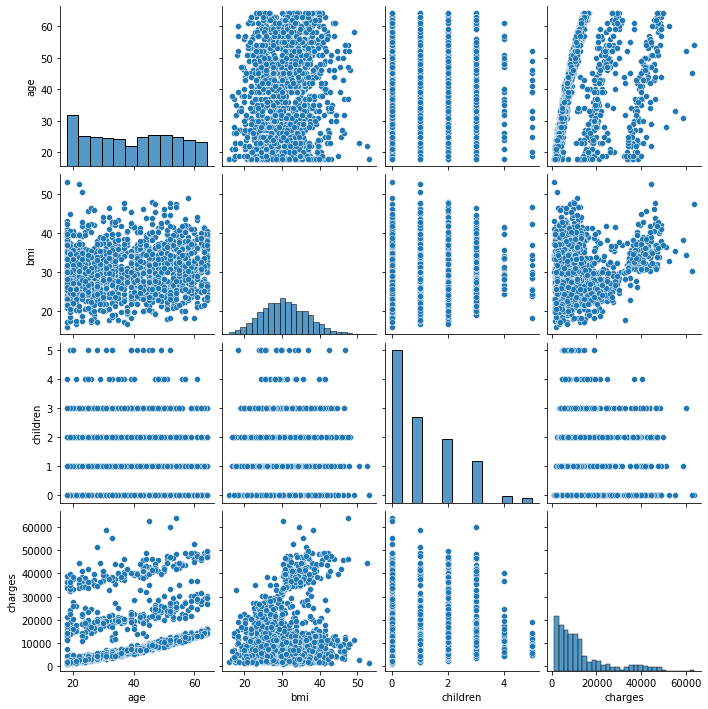

In [ ]:
sns.pairplot(insurance)
plt.show()

### **AGE** 
 age of primary beneficiary

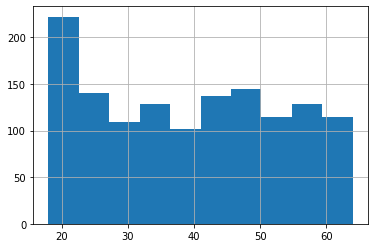

In [ ]:
_= insurance['age'].hist()

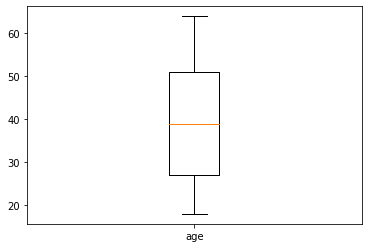

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([insurance['age']])
ax.set_xticklabels(['age'])
plt.show()

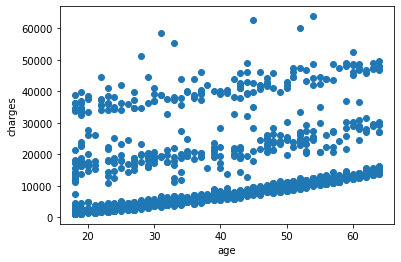

In [ ]:
fig, ax = plt.subplots()
ax.scatter(insurance['age'], insurance['charges'])
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

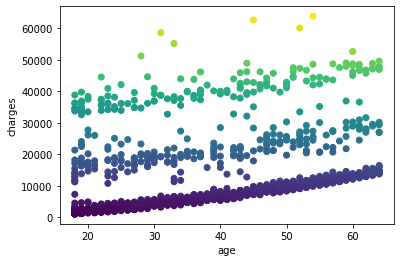

In [ ]:
fig, ax = plt.subplots()
ax.scatter(insurance['age'], insurance['charges'],c=insurance['charges'])
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

Możemy zauważyć trzy podrupy dla których opłata mieści się w określonych przedziałach

### **SEX**

In [ ]:
insurance['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

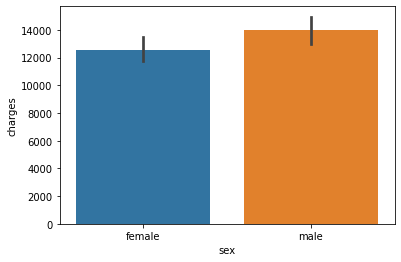

In [ ]:
sns.barplot(x='sex', y='charges', data=insurance)
plt.show()

### **BMI** 
Body mass index (the ratio of body weight to height, the norm is from 18.5 to 24.9).

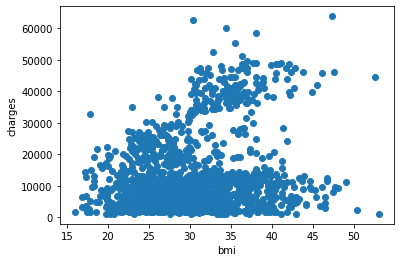

In [ ]:
fig, ax = plt.subplots()
ax.scatter(insurance['bmi'], insurance['charges'])
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
plt.show()

### **CHILDREN**

Number of children covered by health insurance / number of dependents.

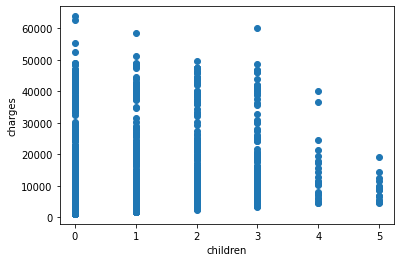

In [ ]:
fig, ax = plt.subplots()
ax.scatter(insurance['children'], insurance['charges'])
ax.set_xlabel('children')
ax.set_ylabel('charges')
plt.show()

### **SMOKER** 
Information whether the insured person smokes cigarettes.

In [ ]:
insurance['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

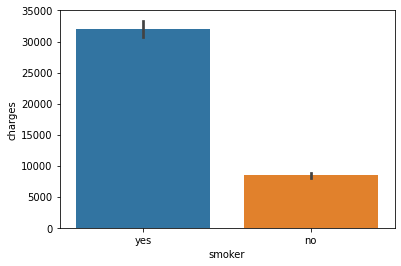

In [ ]:
sns.barplot(x='smoker', y='charges', data=insurance)
plt.show()

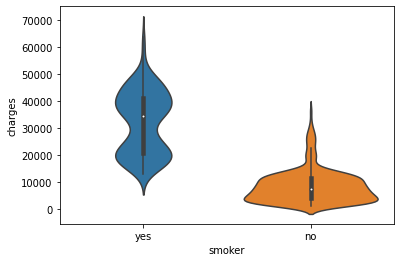

In [ ]:
sns.violinplot(x='smoker', y='charges', data=insurance)
plt.show()

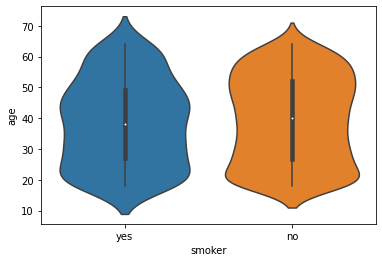

In [ ]:
sns.violinplot(x='smoker', y='age', data=insurance)
plt.show()

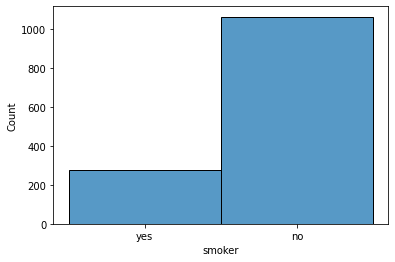

In [ ]:
sns.histplot(insurance['smoker'])
plt.show()

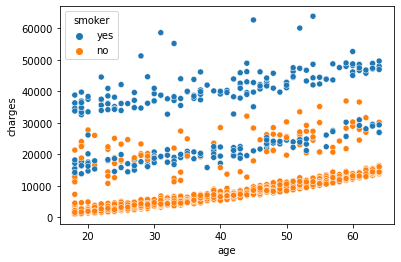

In [ ]:
sns.scatterplot(x='age', y='charges', hue='smoker' ,data=insurance)
plt.show() 

In [ ]:
groupby = insurance.groupby('smoker')
yes ,no = [groupby.get_group(x) for x in groupby.groups]

In [ ]:
yes.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [ ]:
no.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


Do grupy pacjetów z niskimi kosztami leczenia należą wyłacznie osboby niepalące, natomiast większość pacjętów z grupy wysokich kosztów leczenia to osoby palące.
Można uznać, że informacja o tym czy dany pacjęt jest osobą palącą będzie miała istotny wpływ na koszt jego leczenia. 
 

### **REGION** 
The insured's area of residence.

In [ ]:
insurance['region'].value_counts(normalize=True) 

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

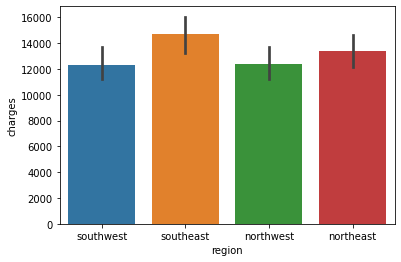

In [ ]:
sns.barplot(x='region', y='charges', data=insurance)
plt.show()

In [ ]:
insurance.groupby(['region'])['smoker'].value_counts(normalize=True) 

region     smoker
northeast  no        0.793210
           yes       0.206790
northwest  no        0.821538
           yes       0.178462
southeast  no        0.750000
           yes       0.250000
southwest  no        0.821538
           yes       0.178462
Name: smoker, dtype: float64

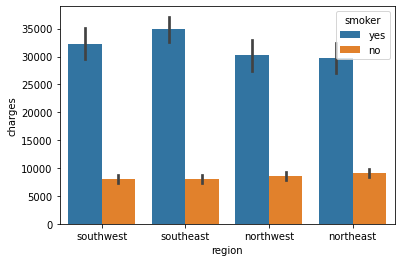

In [ ]:
sns.barplot(x='region', y='charges', hue='smoker' ,data=insurance)
plt.show() 

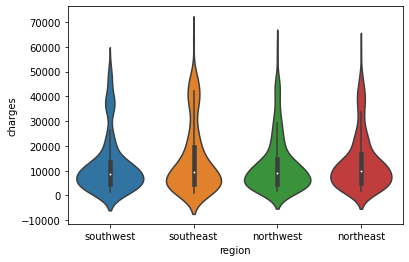

In [ ]:
sns.violinplot(x='region', y='charges', data=insurance)
plt.show()

Region z którego pochodzi ubezpieczony nie ma wpływu na wysokość kosztów leczenia. 

### **Charges** 
Payment for medical expenses according to the insured's premium.

Sprawdźmy jak wygląda rozkład gęstości wysookści kosztów leczenia

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


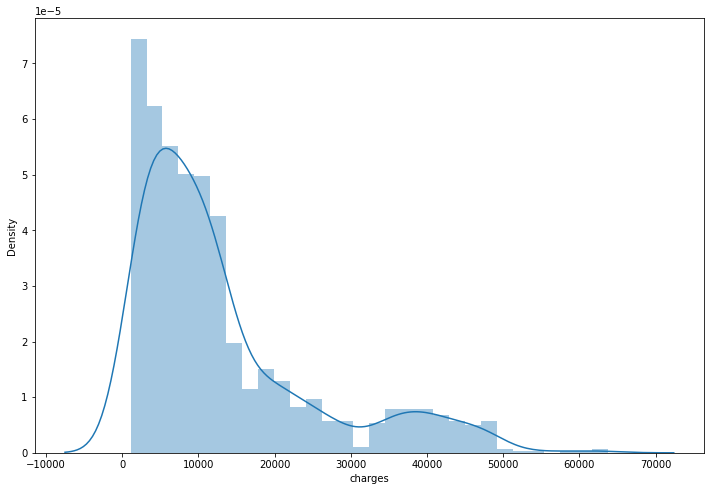

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(insurance['charges'])
plt.show()

# **Przygotowanie danych**

Cechy: **smoker** oraz region są wyrażone za pomoca stringów oraz sa cechami kategorycznymi dlategozmienimy ich wartości na binarne.

In [ ]:
insurance = pd.concat([insurance, pd.get_dummies(insurance['smoker'],drop_first=True, prefix ='smoker')], axis=1)
insurance = pd.concat([insurance, pd.get_dummies(insurance['region'],drop_first=True)], axis=1)
insurance

Usuwamy kolumny **smoker**, **region** (informacje z tych cech są zawarte już w innych cechach), **sex** (nie chcemy żeby Nasza składka była uzależniona od płci).

In [ ]:
insurance.drop(['sex','smoker','region'], axis=1, inplace=True)
insurance

Podzielmy zmienne na **numeryczne** i **kategoryczne**, naszym targetem jest **charges**.


In [ ]:
numeric_features = ['age', 'bmi','children']
categorical_features = ['male','smoker_yes','northwest', 'southeast','southwest']

target = 'charges'

In [ ]:
sns.heatmap(insurance.corr())

In [ ]:
insurance.info()

# **Zbiór treningowy i testowy**
Wskażmy, które zmienne są Naszym **X**, a które **y**.

In [ ]:
X = insurance.drop([target], axis=1)
y = insurance[target]

In [ ]:
X

In [ ]:
y

 Podzielimy nasz zbiór na **Train** oraz **Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [ ]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print()
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

Obliczmy średnią oraz odchylenie dla zmiennych **age** oraz **bmi** dla zbioru trenigowego i wykonajmy standaryację dla tych zmiennych na zbiorze trenigowym oraz testowym wykorzystując parametry obliczone tylko na zbiorze **treningowym**. 

In [ ]:
mean_x_train_bmi = X_train['bmi'].mean()
std_x_train_bmi  = X_train['bmi'].std() 

mean_x_train_age = X_train['age'].mean()
std_x_train_age  = X_train['age'].std() 

In [ ]:
X_train['bmi']=(X_train['bmi']-mean_x_train_bmi)/std_x_train_bmi
X_test['bmi']=(X_test['bmi']-mean_x_train_bmi)/std_x_train_bmi

X_train['age']=(X_train['age']-mean_x_train_age)/std_x_train_age
X_test['age']=(X_test['age']-mean_x_train_age)/std_x_train_age

X_train

# **Dummy Model**
Stwórzmy prosty model, który będzie prognozował średnią ze zbioru treningowego.

In [ ]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

In [ ]:
y_train_dummy = dummy_model.predict(X_train)
y_test_dummy = dummy_model.predict(X_test)

In [ ]:
y_test_dummy[:5]

# **Regression Model**

In [ ]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
lr_model.intercept_
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

# **Ocena modelu**

Zdefiniujmy funkcję dla oceny modelu 

In [ ]:
def factor_funcion(name,X, y, y_predict):
  print(name)
  print()
  y_dummy = dummy_model.predict(X)
  mse_model = round(mean_squared_error(y, y_predict),2)
  mse_dummy = round(mean_squared_error(y, y_dummy),2)
  if name == 'train':
    print("R^2")
    print(f'Dummy Train: {round(r2_score(y, y_dummy),2)}') 
    print(f'Model Train: {round(r2_score(y, y_predict),2)}')
  print("MAE")
  print(f'Dummy: {round(mean_absolute_error(y, y_dummy),2)}')
  print(f'Model: {round(mean_absolute_error(y, y_predict),2)}')
  print()
  print('MSE')
  print(f'Dummy: {round(mse_dummy,2)}')
  print(f'Model: {round(mse_model,2)}')
  print()
  print("RMSE")
  print(f'Dummy: {round(sqrt(mse_dummy),2)}')
  print(f'Model: {round(sqrt(mse_model),2)}')
  print()
  print("MAPE")
  print(f'Dummy: {round(mean_absolute_percentage_error(y, y_dummy)*100,2)}%')
  print(f'Model: {round(mean_absolute_percentage_error(y, y_predict)*100,2)}%')

Wskaźniki oceny dla zbioru treningowego 

In [ ]:
factor_funcion('train',X_train, y_train, y_predict_train)

train

R^2
Dummy Train: 0.0
Model Train: 0.74
MAE
Dummy: 9172.63
Model: 4293.12

MSE
Dummy: 147155488.52
Model: 38663101.92

RMSE
Dummy: 12130.77
Model: 6217.97

MAPE
Dummy: 151.83%
Model: 43.19%


Wskaźniki oceny dla zbioru testowego

In [ ]:
factor_funcion('test',X_test, y_test, y_predict_test)

In [ ]:
def vizualization_of_errors(y, y_predict):
  plt.scatter(x= y_predict, y = y, alpha=0.25)
  xmin, xmax = y.min(), y.max()
  x_line = np.linspace(xmin, xmax, 10)
  y_line = x_line
#oczekiwana linia pędu
  plt.plot(x_line, y_line, 'r--')
  plt.xlabel('Prediction')
  plt.ylabel('True value')
  plt.title('Plot of predicted values versustrue values')
  plt.show()
  errors = y_predict - y
  plt.scatter(x= y, y= errors, alpha= 0.25)
  plt.axhline(0, color = 'r', linestyle='--')
  plt.xlabel('True value')
  plt.ylabel('Residuals')
  plt.title('Plot of residuals')
  plt.show()
  print(f'Error means: {errors.mean()}')
  plt.hist(errors, bins=20)
  plt.axvline(errors.mean(), color ='k', linestyle='dashed', linewidth=1)
  plt.title('Histogram of residuals')
  plt.show()

Dla lepszej oceny modelu wykonajmy wizualizację porównania wartości prawdziwej z predykcją, wykres reszt oraz histogram reszt.

In [ ]:
vizualization_of_errors(y_test, y_predict_test)

Nastepnie sprawdźmy wysokość współczynnika determinacji dla kolejnych stopni wielomianu.

In [ ]:
rmse_train_list = []
rmse_test_list = []
degree_list = []

for degree in [1, 2, 3, 4, 5, 6]:
    # W pierwszym kroku uczymy się na zbiorze treningowym
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)
    polynomial_regression = LinearRegression() 
    polynomial_regression.fit(X_train_transformed, y_train)
    
    # Policzmy r^2 na zbiorze treningowym - zobaczymy jaką część wariancji wyjaśnia nasz model
    prediction_train = polynomial_regression.predict(X_train_transformed)
    r_2_result = r2_score(y_train, prediction_train)
    print(f'Degree: {degree}, R^2: {np.round(r_2_result, 2)}')
    
    # W następnym kroku wykorzystujemy nasz model na zbiorze testowym i wykonajmy predykcję
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)
    
    # Na koniec policzmy RMSE na naszych zbiorach i umieśmy w listach
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))
    degree_list.append(degree)

Sprawdźmy jak różni się RMSE na zbiorze treningowym w zależności od stopnia wielomianu.

In [ ]:
rmse_train_list

In [ ]:
plt.figure(figsize =(16,9))
plt.scatter(np.array(degree_list), np.array(rmse_train_list), label ='RMSE Train')
plt.scatter(np.array(degree_list), np.array(rmse_test_list),label ='RMSE Test')
plt.yscale('symlog')
plt.legend(loc='upper left')
plt.show()

### WYBÓR HIPERPARAMETRÓW

Badamy dla którgo hiperparametru (stopień wielomianu) nasz model regresi wielomianowej daje najlepszy wynik.

In [ ]:
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
#najpierw wielomina, potem regresja liniowa 
#nasz model sprawdzi poniższe hiperparametry:
params = {'polynomialfeatures__degree':[1,2,3,4,5,6]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline, #tutaj wskazujemy jaki tym regresji
                                                params, 
                                                scoring = 'neg_mean_squared_error', 
                                                cv = 10, #dzielimy na 10 części
                                                verbose= 10)
polynomial_regression_gridsearch.fit(X_train, y_train)
print('\nBest hypermarameter: ', polynomial_regression_gridsearch.best_params_)
polynomial_model = polynomial_regression_gridsearch.best_estimator_

Dla modelu regresji wielomianowej najlepszym hiperparametrem jest 2 stopień wielomianu.

In [ ]:
y_predict_polynomial_best = polynomial_model.predict(X_test)
y_predict_polynomial_best

Badamy dla którgo hiperparametru (maxymalna głebokość drzewa oraz minimalna ilość obserwacji) nasz model drzewa daje najlepszy wynik.

In [ ]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
model_tree = DecisionTreeRegressor()
# Nasz model sprawdzi poniższe hiperparametry
params = {'max_depth': [1, 2, 3, 4, 5, 6],
          'min_samples_leaf': [2,3,5,10]}

model_tree_gridsearch = GridSearchCV(model_tree, 
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=10,
                                                verbose=10)

model_tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', model_tree_gridsearch.best_params_)

model_tree = model_tree_gridsearch.best_estimator_

Dla drzewa decyzyjnego najlepsze otrzymane hiperparametry to: 

*   maksymalna głębokość = 5
*   minimalna liczba obserwacji = 3


In [ ]:
y_predict_tree_best = model_tree.predict(X_test)
y_predict_tree_best

W celu oceny który model lepiej przewiduje wysokość kosztów leczenia porównajmy współczynniki oceny modelu dla najlepszych hiperparametrów otrzymanych powyżej.

In [ ]:
print(factor_funcion('test polynomial best',X_test, y_test, y_predict_polynomial_best))
print("---")
print(factor_funcion('test tree best',X_test, y_test, y_predict_tree_best))

test polynomial best

MAE
Dummy: 9004.3
Model: 2686.6

MSE
Dummy: 144178448.72
Model: 17213223.18

RMSE
Dummy: 12007.43
Model: 4148.88

MAPE
Dummy: 160.68%
Model: 32.04%
None
---
test tree best

MAE
Dummy: 9004.3
Model: 2422.24

MSE
Dummy: 144178448.72
Model: 15601851.2

RMSE
Dummy: 12007.43
Model: 3949.92

MAPE
Dummy: 160.68%
Model: 32.01%
None


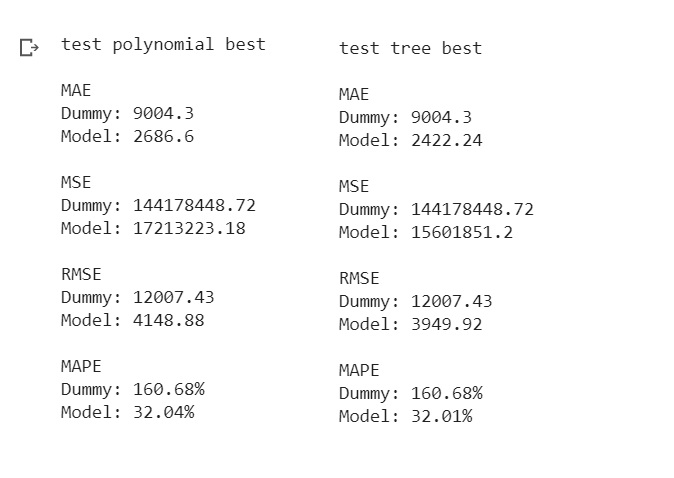

Na podstawie powyższych wsakźników mozemy ocenić, że obydwa modele mają podobną skuteczność.